<a href="https://colab.research.google.com/github/Marcelooyola/TrabojIntegrador/blob/main/BA_Trabajo_Final_pruebas_24_11.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<center>

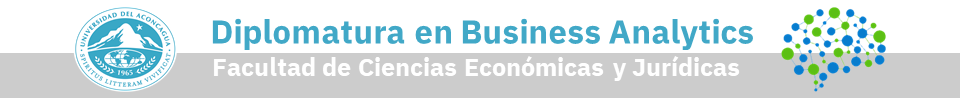

</center>

<center>
<font color="#41a8c7">
<h2><b>
Código Trabajo Final - Caso Rotación de Clientes - Customer Churn

</font>
</center>

## Descripción dataset

Data Description

7043 observations with 33 variables

CustomerID: A unique ID that identifies each customer.

Count: A value used in reporting/dashboarding to sum up the number of customers in a filtered set.

Country: The country of the customer’s primary residence.

State: The state of the customer’s primary residence.

City: The city of the customer’s primary residence.

Zip Code: The zip code of the customer’s primary residence.

Lat Long: The combined latitude and longitude of the customer’s primary residence.

Latitude: The latitude of the customer’s primary residence.

Longitude: The longitude of the customer’s primary residence.

Gender: The customer’s gender: Male, Female

Senior Citizen: Indicates if the customer is 65 or older: Yes, No

Partner: Indicate if the customer has a partner: Yes, No

Dependents: Indicates if the customer lives with any dependents: Yes, No. Dependents could be children, parents, grandparents, etc.

Tenure Months: Indicates the total amount of months that the customer has been with the company by the end of the quarter specified above.

Phone Service: Indicates if the customer subscribes to home phone service with the company: Yes, No

Multiple Lines: Indicates if the customer subscribes to multiple telephone lines with the company: Yes, No

Internet Service: Indicates if the customer subscribes to Internet service with the company: No, DSL, Fiber Optic, Cable.

Online Security: Indicates if the customer subscribes to an additional online security service provided by the company: Yes, No

Online Backup: Indicates if the customer subscribes to an additional online backup service provided by the company: Yes, No

Device Protection: Indicates if the customer subscribes to an additional device protection plan for their Internet equipment provided by the company: Yes, No

Tech Support: Indicates if the customer subscribes to an additional technical support plan from the company with reduced wait times: Yes, No

Streaming TV: Indicates if the customer uses their Internet service to stream television programing from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Streaming Movies: Indicates if the customer uses their Internet service to stream movies from a third party provider: Yes, No. The company does not charge an additional fee for this service.

Contract: Indicates the customer’s current contract type: Month-to-Month, One Year, Two Year.

Paperless Billing: Indicates if the customer has chosen paperless billing: Yes, No

Payment Method: Indicates how the customer pays their bill: Bank Withdrawal, Credit Card, Mailed Check

Monthly Charge: Indicates the customer’s current total monthly charge for all their services from the company.

Total Charges: Indicates the customer’s total charges, calculated to the end of the quarter specified above.

Churn Label: Yes = the customer left the company this quarter. No = the customer remained with the company. Directly related to Churn Value.

Churn Value: 1 = the customer left the company this quarter. 0 = the customer remained with the company. Directly related to Churn Label.

Churn Score: A value from 0-100 that is calculated using the predictive tool IBM SPSS Modeler. The model incorporates multiple factors known to cause churn. The higher the score, the more likely the customer will churn.

CLTV: Customer Lifetime Value. A predicted CLTV is calculated using corporate formulas and existing data. The higher the value, the more valuable the customer. High value customers should be monitored for churn.

Churn Reason: A customer’s specific reason for leaving the company. Directly related to Churn Category.

La deserción de clientes (también conocida como pérdida de clientes) es una de los mayores causas de pérdida de cualquier organización. Si pudiéramos averiguar por qué un cliente se va y cuándo se va con una precisión razonable, ayudaría enormemente a la organización a diseñar estrategias de fidelización.

#Objetivo

Lo que se pretende predecir el valor de CLTV (Customer life time value) dicha variable es el valor de vida del cliente, el cual mientras tenga un valor más alto mejor.
Basicamente es que tan fiel es el cliente a la empresa y esta compuesto de tres aristas:.

* Recencia: Cuándo fue la última vez que compró
* Frecuencia: Cuántas veces ha comprado en la empresa
* Valor monetario: Cuánto ha gastado el cliente en la empresa


# Carga de datos

In [1]:
!pip install pycaret

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 484.7/484.7 kB 5.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 81.9/81.9 kB 8.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 79.9/79.9 MB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.8/11.8 MB 45.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 73.4/73.4 kB 6.6 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.1/2.1 MB 50.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 160.5/160.5 kB 11.0 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 106.8/106.8 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 34.4/34.4 MB 14.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.1/17.1 MB 77.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 44.0/44.0 kB 4.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 60.3 MB/s e

In [34]:
import pandas as pd
import plotly.express as px
import plotly.graph_objects as go

import numpy as np

#escalar variables numericas
from sklearn.preprocessing import StandardScaler


In [3]:
#Pycaret

from pycaret.regression import *

In [61]:
train_01 = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/train.csv", index_col=0)
test = pd.read_csv("https://raw.githubusercontent.com/LucaAPiattelli/Diplomatura_Business_Analytics_UDA/main/Datasets/test.csv", index_col=0)

In [62]:
train = pd.concat([train_01, test], ignore_index=True)

In [63]:
train.head()

,CustomerID,Count,Country,State,City,Zip Code,Lat Long,Latitude,Longitude,Gender,...,Streaming TV,Streaming Movies,Contract,Paperless Billing,Payment Method,Monthly Charges,Total Charges,Churn Label,CLTV,Churn Reason
0,7838-LAZFO,1,United States,California,Hanford,93230,"36.29223, -119.622676",36.292230,-119.622676,Male,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
1,8189-DUKMV,1,United States,California,Rancho Cordova,95742,"38.591134, -121.161585",38.591134,-121.161585,Female,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2,3758-CKOQL,1,United States,California,Valyermo,93563,"34.39583, -117.734568",34.395830,-117.734568,Female,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3,5619-PTMIK,1,United States,California,Lemon Grove,91945,"32.733564, -117.033713",32.733564,-117.033713,Female,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
4,9115-YQHGA,1,United States,California,Lemoore,93245,"36.303666, -119.825657",36.303666,-119.825657,Male,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


In [64]:
train.isnull().sum().sort_values(ascending=False)

Churn Reason         5163
Internet Service        0
CLTV                    0
Churn Label             0
Total Charges           0
Monthly Charges         0
Payment Method          0
Paperless Billing       0
Contract                0
Streaming Movies        0
Streaming TV            0
Tech Support            0
Device Protection       0
Online Backup           0
Online Security         0
CustomerID              0
Count                   0
Phone Service           0
Tenure Months           0
Dependents              0
Partner                 0
Senior Citizen          0
Gender                  0
Longitude               0
Latitude                0
Lat Long                0
Zip Code                0
City                    0
State                   0
Country                 0
Multiple Lines          0
dtype: int64

In [65]:
train.Count.describe()

count    7032.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Count, dtype: float64

In [66]:
for i in train.columns:
  #print(f"{train[i]}")
  print(f"{train[i].describe()}")

count           7032
unique          7032
top       7838-LAZFO
freq               1
Name: CustomerID, dtype: object
count    7032.0
mean        1.0
std         0.0
min         1.0
25%         1.0
50%         1.0
75%         1.0
max         1.0
Name: Count, dtype: float64
count              7032
unique                1
top       United States
freq               7032
Name: Country, dtype: object
count           7032
unique             1
top       California
freq            7032
Name: State, dtype: object
count            7032
unique           1129
top       Los Angeles
freq              304
Name: City, dtype: object
count     7032.000000
mean     93523.032565
std       1865.515958
min      90001.000000
25%      92102.000000
50%      93552.500000
75%      95354.000000
max      96161.000000
Name: Zip Code, dtype: float64
count                       7032
unique                      1652
top       34.037037, -118.705803
freq                           5
Name: Lat Long, dtype: object
count    

In [67]:
train.isnull().sum()

CustomerID              0
Count                   0
Country                 0
State                   0
City                    0
Zip Code                0
Lat Long                0
Latitude                0
Longitude               0
Gender                  0
Senior Citizen          0
Partner                 0
Dependents              0
Tenure Months           0
Phone Service           0
Multiple Lines          0
Internet Service        0
Online Security         0
Online Backup           0
Device Protection       0
Tech Support            0
Streaming TV            0
Streaming Movies        0
Contract                0
Paperless Billing       0
Payment Method          0
Monthly Charges         0
Total Charges           0
Churn Label             0
CLTV                    0
Churn Reason         5163
dtype: int64

***Churn Reason tiene 3863 nulos porque son la cantidad de clientes QUE NO SE FUERON y por lo tanto no tienen un motivo por el cual se han ido***

In [68]:
for i in train.columns:
  if ' ' in train[i].name:
      nombre_modificado = train[i].name.replace(' ', '_')
      train.rename(columns={train[i].name: nombre_modificado}, inplace=True)
      print("Nombre modificado:", nombre_modificado)
  else:
      print("El nombre no tiene espacios en blanco.")
      print(f"{train[i].name}")

El nombre no tiene espacios en blanco.
CustomerID
El nombre no tiene espacios en blanco.
Count
El nombre no tiene espacios en blanco.
Country
El nombre no tiene espacios en blanco.
State
El nombre no tiene espacios en blanco.
City
Nombre modificado: Zip_Code
Nombre modificado: Lat_Long
El nombre no tiene espacios en blanco.
Latitude
El nombre no tiene espacios en blanco.
Longitude
El nombre no tiene espacios en blanco.
Gender
Nombre modificado: Senior_Citizen
El nombre no tiene espacios en blanco.
Partner
El nombre no tiene espacios en blanco.
Dependents
Nombre modificado: Tenure_Months
Nombre modificado: Phone_Service
Nombre modificado: Multiple_Lines
Nombre modificado: Internet_Service
Nombre modificado: Online_Security
Nombre modificado: Online_Backup
Nombre modificado: Device_Protection
Nombre modificado: Tech_Support
Nombre modificado: Streaming_TV
Nombre modificado: Streaming_Movies
El nombre no tiene espacios en blanco.
Contract
Nombre modificado: Paperless_Billing
Nombre modifi

In [69]:
train.head()

,CustomerID,Count,Country,State,City,Zip_Code,Lat_Long,Latitude,Longitude,Gender,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
0,7838-LAZFO,1,United States,California,Hanford,93230,"36.29223, -119.622676",36.292230,-119.622676,Male,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
1,8189-DUKMV,1,United States,California,Rancho Cordova,95742,"38.591134, -121.161585",38.591134,-121.161585,Female,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2,3758-CKOQL,1,United States,California,Valyermo,93563,"34.39583, -117.734568",34.395830,-117.734568,Female,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3,5619-PTMIK,1,United States,California,Lemon Grove,91945,"32.733564, -117.033713",32.733564,-117.033713,Female,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
4,9115-YQHGA,1,United States,California,Lemoore,93245,"36.303666, -119.825657",36.303666,-119.825657,Male,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


In [70]:
train = train.drop(columns = ["CustomerID", "Count", "Country", "State", "Lat_Long", "Gender", "City", "Latitude", "Longitude"])
train.head()

,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
0,93230,No,Yes,No,45,Yes,No,DSL,Yes,Yes,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,NaN
1,95742,No,Yes,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,NaN
2,93563,No,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,NaN
3,91945,No,Yes,No,46,Yes,Yes,DSL,Yes,No,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,NaN
4,93245,No,No,No,40,Yes,No,DSL,No,No,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,NaN


##División de variables numéricas y categóricas

In [71]:
#numericas
cols_numericas = list(train.select_dtypes(exclude=["object"]))
cols_numericas

['Zip_Code', 'Tenure_Months', 'Monthly_Charges', 'Total_Charges', 'CLTV']

In [72]:
#categoricas
cols_categoricas = list(train.select_dtypes(include=["object"]))
cols_categoricas

['Senior_Citizen',
 'Partner',
 'Dependents',
 'Phone_Service',
 'Multiple_Lines',
 'Internet_Service',
 'Online_Security',
 'Online_Backup',
 'Device_Protection',
 'Tech_Support',
 'Streaming_TV',
 'Streaming_Movies',
 'Contract',
 'Paperless_Billing',
 'Payment_Method',
 'Churn_Label',
 'Churn_Reason']

In [74]:
train.Monthly_Charges.describe()

count    7032.000000
mean       64.798208
std        30.085974
min        18.250000
25%        35.587500
50%        70.350000
75%        89.862500
max       118.750000
Name: Monthly_Charges, dtype: float64

In [75]:
train[cols_numericas].describe(percentiles=[.01,.1,.25,.50,.75,.90,.99])

,Zip_Code,Tenure_Months,Monthly_Charges,Total_Charges,CLTV
count,7032.000000,7032.000000,7032.000000,7032.000000,7032.000000
mean,93523.032565,32.421786,64.798208,2283.300441,4401.445108
std,1865.515958,24.545260,30.085974,2266.771362,1182.414266
min,90001.000000,1.000000,18.250000,18.800000,2003.000000
1%,90016.000000,1.000000,19.200000,19.900000,2051.000000
10%,90731.000000,2.000000,20.050000,84.600000,2613.000000
25%,92102.000000,9.000000,35.587500,401.450000,3469.750000
50%,93552.500000,29.000000,70.350000,1397.475000,4527.500000
75%,95354.000000,55.000000,89.862500,3794.737500,5381.000000
90%,95909.300000,69.000000,102.645000,5976.640000,5865.000000


In [76]:
for i in train[cols_numericas]:
  fig = px.box(train, y = train[i])
  fig.show()

Tras haber observado los datos numericos, dichos datos se concentran de manera uniforme en el 99% de los casos.

No se observa necesidad de realizar poda de datos.

## Variables nulas

In [77]:
train.replace({None: "Es cliente"}, inplace = True)
train.head()

,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
0,93230,No,Yes,No,45,Yes,No,DSL,Yes,Yes,...,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,Es cliente
1,95742,No,Yes,No,4,Yes,No,No,No internet service,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,Es cliente
2,93563,No,Yes,No,59,Yes,Yes,Fiber optic,Yes,Yes,...,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,Es cliente
3,91945,No,Yes,No,46,Yes,Yes,DSL,Yes,No,...,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,Es cliente
4,93245,No,No,No,40,Yes,No,DSL,No,No,...,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,Es cliente


##Estandarización de datos

In [ ]:
top_cities = train['City'].value_counts().nlargest(5).index
train['City_limited'] = train['City'].where(train['City'].isin(top_cities), 'Otros')

if 'City' in cols_categoricas:
    indice_city = cols_categoricas.index('City')
    cols_categoricas[indice_city] = 'City_limited'

train = train.drop(columns = ["City"])
print(cols_categoricas)


In [ ]:
# estandarizacion de churn reason
top_cr = train['Churn_Reason'].value_counts().nlargest(5).index
train['Churn_Reason_limited'] = train['Churn_Reason'].where(train['Churn_Reason'].isin(top_cr), 'Otros')

if 'Churn_Reason' in cols_categoricas:
    indice_cr = cols_categoricas.index('Churn_Reason')
    cols_categoricas[indice_cr] = 'Churn_Reason_limited'

train = train.drop(columns = ["Churn_Reason"])
print(cols_categoricas)

['City_limited', 'Senior_Citizen', 'Partner', 'Dependents', 'Phone_Service', 'Multiple_Lines', 'Internet_Service', 'Online_Security', 'Online_Backup', 'Device_Protection', 'Tech_Support', 'Streaming_TV', 'Streaming_Movies', 'Contract', 'Paperless_Billing', 'Payment_Method', 'Churn_Label', 'Churn_Reason_limited']


In [ ]:
df1 = train[cols_numericas]

for i in train[cols_categoricas]:
  dummy_cols = pd.get_dummies(train[i], prefix= train[i].name)

  df1 = pd.concat([df1, dummy_cols], axis=1)

df1



,Tenure_Months,Monthly_Charges,Total_Charges,CLTV,City_limited_Los Angeles,City_limited_Otros,City_limited_Sacramento,City_limited_San Diego,City_limited_San Francisco,City_limited_San Jose,...,Payment_Method_Electronic check,Payment_Method_Mailed check,Churn_Label_No,Churn_Label_Yes,Churn_Reason_limited_Attitude of support person,Churn_Reason_limited_Competitor offered higher download speeds,Churn_Reason_limited_Competitor offered more data,Churn_Reason_limited_Don't know,Churn_Reason_limited_Es cliente,Churn_Reason_limited_Otros
5552,45,78.80,3597.50,4192,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
5805,4,20.50,79.05,3233,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
2640,59,107.00,6152.30,4620,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
3976,46,53.10,2459.80,3358,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
6429,40,51.10,2092.90,3355,0,1,0,0,0,0,...,1,0,1,0,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1565,32,19.75,624.15,4691,0,1,0,0,0,0,...,0,0,1,0,0,0,0,0,1,0
4159,9,70.05,657.50,3522,0,1,0,0,0,0,...,0,1,1,0,0,0,0,0,1,0
3218,7,93.85,635.60,3506,0,1,0,0,0,0,...,1,0,0,1,0,0,0,0,0,1
3409,1,86.00,86.00,5359,0,0,0,0,1,0,...,1,0,0,1,0,0,0,0,0,1


In [ ]:
#print(train[cols_numericas])

In [ ]:
#scaled_columns = df1[cols_numericas]

# Inicializar el objeto StandardScaler
#scaler = StandardScaler()

# Aplicar el escalado a las columnas numéricas
#df1[cols_numericas] = scaler.fit_transform(scaled_columns)

In [ ]:
#df1

#PyCaret

In [79]:
regresion = setup(data = train,
                  target = "CLTV",
                  train_size = 0.80,
                  session_id = 123,
                  normalize = True,
                  transformation = True
                  )


,Description,Value
0,Session id,123
1,Target,CLTV
2,Target type,Regression
3,Original data shape,"(7032, 22)"
4,Transformed data shape,"(7032, 63)"
5,Transformed train set shape,"(5625, 63)"
6,Transformed test set shape,"(1407, 63)"
7,Ordinal features,6
8,Numeric features,4
9,Categorical features,17


In [80]:
regresion.dataset

,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,...,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Reason,CLTV
5472,93710,No,Yes,No,19,Yes,Yes,Fiber optic,Yes,Yes,...,No,No,Month-to-month,Yes,Credit card (automatic),88.800003,1672.349976,No,Es cliente,4600
5425,95969,No,No,No,22,Yes,Yes,Fiber optic,No,No,...,No,Yes,Month-to-month,No,Electronic check,83.050003,1799.300049,No,Es cliente,5357
3563,90745,No,No,No,42,Yes,Yes,Fiber optic,No,No,...,No,No,Month-to-month,No,Electronic check,79.900002,3313.399902,No,Es cliente,2583
2096,95693,No,Yes,Yes,35,Yes,Yes,DSL,Yes,Yes,...,No,No,Month-to-month,Yes,Credit card (automatic),59.450001,2136.899902,No,Es cliente,3682
7008,92064,No,Yes,No,35,No,No phone service,DSL,Yes,No,...,Yes,No,Two year,Yes,Credit card (automatic),46.349998,1662.050049,No,Es cliente,4577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,92328,No,Yes,Yes,54,Yes,Yes,DSL,No,Yes,...,Yes,Yes,Month-to-month,Yes,Electronic check,86.199997,4524.049805,No,Es cliente,6275
2612,90744,No,No,No,35,Yes,Yes,No,No internet service,No internet service,...,No internet service,No internet service,One year,No,Bank transfer (automatic),26.200001,954.900024,No,Es cliente,4419
2765,95374,No,No,No,15,Yes,Yes,Fiber optic,No,Yes,...,No,No,Month-to-month,Yes,Electronic check,79.750000,1111.849976,Yes,Limited range of services,2813
4898,94558,Yes,Yes,No,26,Yes,Yes,Fiber optic,No,Yes,...,No,Yes,Month-to-month,Yes,Electronic check,93.849998,2381.550049,Yes,Network reliability,2591


In [81]:
#los datos ya estan ajustados
regresion.dataset_transformed

,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines_Yes,Multiple_Lines_No phone service,Multiple_Lines_No,Internet_Service_Fiber optic,...,Churn_Reason_Service dissatisfaction,Churn_Reason_Competitor made better offer,Churn_Reason_Lack of affordable download/upload speed,Churn_Reason_Poor expertise of online support,Churn_Reason_Limited range of services,Churn_Reason_Competitor offered more data,Churn_Reason_Moved,Churn_Reason_Deceased,Churn_Reason_Poor expertise of phone support,CLTV
5472,0.039997,-0.435281,1.030876,-0.552911,-0.314496,0.326876,1.174925,-0.326876,-0.967290,1.129782,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,4600
5425,1.396680,-0.435281,-0.970048,-0.552911,-0.178897,0.326876,1.174925,-0.326876,-0.967290,1.129782,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,5357
3563,-1.417700,-0.435281,-0.970048,-0.552911,0.545380,0.326876,1.174925,-0.326876,-0.967290,1.129782,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,2583
2096,1.218225,-0.435281,1.030876,1.808610,0.318443,0.326876,1.174925,-0.326876,-0.967290,-0.885127,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,3682
7008,-0.810679,-0.435281,1.030876,-0.552911,0.318443,-3.059267,-0.851118,3.059267,-0.967290,-0.885127,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,4577
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,-0.681453,-0.435281,1.030876,1.808610,0.891498,0.326876,1.174925,-0.326876,-0.967290,-0.885127,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,6275
2612,-1.418137,-0.435281,-0.970048,-0.552911,0.318443,0.326876,1.174925,-0.326876,-0.967290,-0.885127,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,4419
2765,1.016531,-0.435281,-0.970048,-0.552911,-0.513964,0.326876,1.174925,-0.326876,-0.967290,1.129782,...,-0.112255,-0.141229,-0.080257,-0.053409,12.637812,-0.153204,-0.088791,-0.026676,-0.056659,2813
4898,0.522197,2.297368,1.030876,-0.552911,-0.012380,0.326876,1.174925,-0.326876,-0.967290,1.129782,...,-0.112255,-0.141229,-0.080257,-0.053409,-0.079128,-0.153204,-0.088791,-0.026676,-0.056659,2591


## Modelos

In [82]:
models()

,Name,Reference,Turbo
ID,,,
lr,Linear Regression,sklearn.linear_model._base.LinearRegression,True
lasso,Lasso Regression,sklearn.linear_model._coordinate_descent.Lasso,True
ridge,Ridge Regression,sklearn.linear_model._ridge.Ridge,True
en,Elastic Net,sklearn.linear_model._coordinate_descent.Elast...,True
lar,Least Angle Regression,sklearn.linear_model._least_angle.Lars,True
llar,Lasso Least Angle Regression,sklearn.linear_model._least_angle.LassoLars,True
omp,Orthogonal Matching Pursuit,sklearn.linear_model._omp.OrthogonalMatchingPu...,True
br,Bayesian Ridge,sklearn.linear_model._bayes.BayesianRidge,True
ard,Automatic Relevance Determination,sklearn.linear_model._bayes.ARDRegression,False


In [83]:
#modelos = compare_models()

modelos = compare_models(n_select=5)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,20:58:28
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE,TT (Sec)
lasso,Lasso Regression,925.7856,1214865.3511,1101.8563,0.1259,0.2842,0.2498,0.8230
ridge,Ridge Regression,925.7395,1215331.0970,1102.0572,0.1256,0.2842,0.2497,1.1690
lr,Linear Regression,925.7609,1215455.1605,1102.1119,0.1255,0.2842,0.2497,1.7080
llar,Lasso Least Angle Regression,928.6290,1219825.3135,1104.1590,0.1222,0.2848,0.2508,0.8690
huber,Huber Regressor,926.0079,1224301.6767,1106.0928,0.1191,0.2861,0.2516,1.0720
omp,Orthogonal Matching Pursuit,930.3434,1226727.6063,1107.2613,0.1172,0.2856,0.2514,1.0530
br,Bayesian Ridge,932.0417,1229659.2062,1108.5813,0.1152,0.2859,0.2520,0.8640
en,Elastic Net,935.2514,1233990.5708,1110.5425,0.1121,0.2865,0.2533,0.8040
par,Passive Aggressive Regressor,936.1057,1262694.0923,1123.2377,0.0918,0.2900,0.2551,1.1080
knn,K Neighbors Regressor,993.6643,1436455.7553,1197.9853,-0.0330,0.3036,0.2645,0.9660


Processing:   0%|          | 0/85 [00:00<?, ?it/s]

KeyboardInterrupt: ignored

In [23]:
print(modelos)

[AdaBoostRegressor(random_state=123), GradientBoostingRegressor(random_state=123), RandomForestRegressor(n_jobs=-1, random_state=123), LGBMRegressor(n_jobs=-1, random_state=123), Lasso(random_state=123)]


##Creación del modelo

In [84]:
modelo_01 = create_model('rf')

,MAE,MSE,RMSE,R2,RMSLE,MAPE
Fold,,,,,,
0,895.3392,1155000.3612,1074.7094,0.1280,0.2706,0.2283
1,954.4323,1236650.6570,1112.0480,0.1032,0.2812,0.2453
2,939.4956,1242995.6437,1114.8971,0.1674,0.2957,0.2609
3,928.6835,1194793.7632,1093.0662,0.1492,0.2752,0.2397
4,889.5146,1119809.6814,1058.2106,0.1775,0.2708,0.2363
5,880.8961,1092077.2578,1045.0250,0.1501,0.2643,0.2283
6,892.0197,1120007.1633,1058.3039,0.1855,0.2738,0.2388
7,892.0240,1124831.0793,1060.5805,0.1819,0.2685,0.2311
8,896.7171,1123085.2050,1059.7571,0.2214,0.2788,0.2458


Processing:   0%|          | 0/4 [00:00<?, ?it/s]

##Optimizar modelo

In [29]:
optimizar_modelo_01 = tune_model(modelo_01)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,19:59:37
Status,. . . . . . . . . . . . . . . . . .,Searching Hyperparameters
Estimator,. . . . . . . . . . . . . . . . . .,Random Forest Regressor


Processing:   0%|          | 0/7 [00:00<?, ?it/s]

Fitting 10 folds for each of 10 candidates, totalling 100 fits


KeyboardInterrupt: ignored

##Predicción

In [85]:

predict_model(modelo_01)

,Model,MAE,MSE,RMSE,R2,RMSLE,MAPE
0,Random Forest Regressor,911.0229,1164949.6710,1079.3283,0.1789,0.2777,0.2422


,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,Churn_Reason,CLTV,prediction_label
6819,90066,No,Yes,No,63,Yes,Yes,Fiber optic,Yes,No,No,No,Yes,Yes,One year,Yes,Credit card (automatic),99.650002,6311.200195,No,Es cliente,4572,5049.28
364,95638,No,No,No,24,Yes,Yes,Fiber optic,No,No,No,No,Yes,Yes,Month-to-month,Yes,Electronic check,94.099998,2322.850098,No,Es cliente,3192,4208.49
2062,95829,Yes,Yes,No,51,Yes,Yes,Fiber optic,Yes,No,No,No,No,No,Month-to-month,Yes,Electronic check,77.500000,3807.350098,Yes,Competitor offered more data,5748,5493.11
6953,93429,No,No,No,64,Yes,Yes,Fiber optic,Yes,No,Yes,Yes,No,Yes,Two year,No,Credit card (automatic),99.250000,6549.450195,No,Es cliente,5213,5266.88
4860,95629,No,No,No,2,Yes,No,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Month-to-month,No,Mailed check,19.950001,38.150002,No,Es cliente,4079,4417.31
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4275,92328,No,Yes,Yes,54,Yes,Yes,DSL,No,Yes,Yes,Yes,Yes,Yes,Month-to-month,Yes,Electronic check,86.199997,4524.049805,No,Es cliente,6275,5306.93
2612,90744,No,No,No,35,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),26.200001,954.900024,No,Es cliente,4419,4051.89
2765,95374,No,No,No,15,Yes,Yes,Fiber optic,No,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,79.750000,1111.849976,Yes,Limited range of services,2813,4158.36
4898,94558,Yes,Yes,No,26,Yes,Yes,Fiber optic,No,Yes,Yes,No,No,Yes,Month-to-month,Yes,Electronic check,93.849998,2381.550049,Yes,Network reliability,2591,3927.88


##Evaluación del modelo

interactive(children=(ToggleButtons(description='Plot Type:', icons=('',), options=(('Pipeline Plot', 'pipelin…

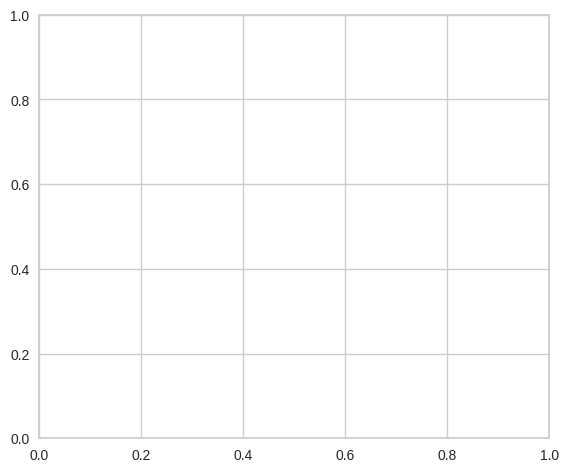

In [31]:
evaluate_model(optimizar_modelo_01)

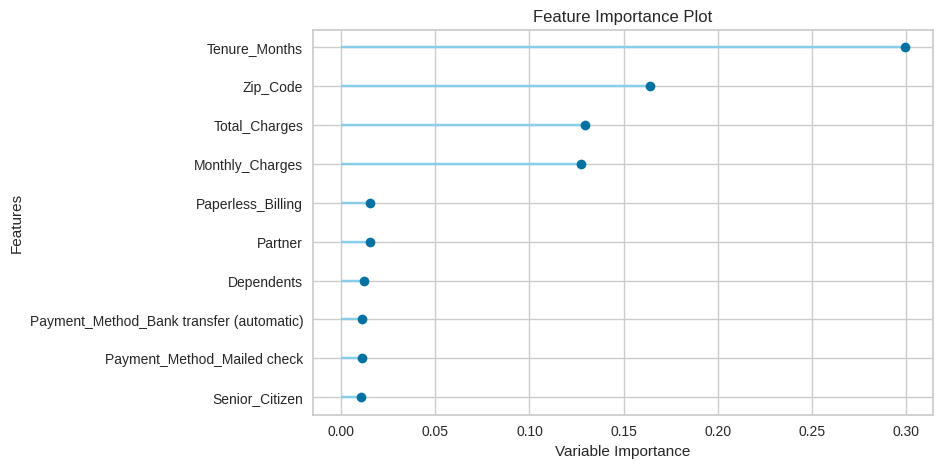

In [32]:

plot_model(modelo_01, plot="feature")

##Estudio del caso

In [90]:
train['Churn_Label'] = train['Churn_Label'].replace({'Yes': 1, 'No': 0})
train.head()

,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
0,93230,No,Yes,No,45,Yes,No,1,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,0,4192,Es cliente
1,95742,No,Yes,No,4,Yes,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,0,3233,Es cliente
2,93563,No,Yes,No,59,Yes,Yes,2,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,0,4620,Es cliente
3,91945,No,Yes,No,46,Yes,Yes,1,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,53.1,2459.80,0,3358,Es cliente
4,93245,No,No,No,40,Yes,No,1,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,0,3355,Es cliente


In [46]:
##CLTV MAYOR A 5387.000000
## churn_label = yes
##tenure_months = y

fig = go.Figure([go.Scatter(x = train.CLTV,
                            y = train.Tenure_Months,
                            mode = "markers",
                            marker = dict(color = train.Churn_Label,
                                          colorscale = 'viridis',
                                          showscale = False),
                            text = train['Churn_Label']),

                 ])

fig.update_layout(template =    "plotly",
                  title =       "tenencia de meses y cltv",
                  xaxis_title = "CLTV",
                  yaxis_title = "Tenencia de meses")

fig.show()


In [47]:
fig = go.Figure([go.Scatter(x = train.Zip_Code,
                            y = train.Tenure_Months,
                            mode = "markers",
                            marker = dict(color = train.Churn_Label,
                                          colorscale = 'viridis',
                                          showscale = False),
                            text = train['Churn_Label']),

                 ])

fig.update_layout(template =    "plotly",
                  title =       "tenencia de meses y codigo postal",
                  xaxis_title = "Codigo Postal",
                  yaxis_title = "Tenencia de meses")

fig.show()


In [48]:
fig = go.Figure([go.Scatter(x = train.Total_Charges,
                            y = train.Tenure_Months,
                            mode = "markers",
                            marker = dict(color = train.Churn_Label,
                                          colorscale = 'viridis',
                                          showscale = False),
                            text = train['Churn_Label']),

                 ])

fig.update_layout(template =    "plotly",
                  title =       "tenencia de meses y Cargos totales",
                  xaxis_title = "Cargos totales $",
                  yaxis_title = "Tenencia de meses")

fig.show()


In [54]:
train.Contract.unique().sum()

'One yearMonth-to-monthTwo year'

In [91]:
train['Contract'] = train['Contract'].replace({'Month-to-month': 0, 'One year': 1, 'Two year': 2})
train.head()

,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
0,93230,No,Yes,No,45,Yes,No,1,Yes,Yes,Yes,No,Yes,Yes,1,No,Bank transfer (automatic),78.8,3597.50,0,4192,Es cliente
1,95742,No,Yes,No,4,Yes,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,1,No,Bank transfer (automatic),20.5,79.05,0,3233,Es cliente
2,93563,No,Yes,No,59,Yes,Yes,2,Yes,Yes,Yes,Yes,No,Yes,1,Yes,Credit card (automatic),107.0,6152.30,0,4620,Es cliente
3,91945,No,Yes,No,46,Yes,Yes,1,Yes,No,No,No,No,No,0,No,Electronic check,53.1,2459.80,0,3358,Es cliente
4,93245,No,No,No,40,Yes,No,1,No,No,No,Yes,No,No,0,Yes,Electronic check,51.1,2092.90,0,3355,Es cliente


In [56]:
fig = go.Figure([go.Scatter(x = train.Contract,
                            y = train.Tenure_Months,
                            mode = "markers",
                            marker = dict(color = train.Churn_Label,
                                          colorscale = 'viridis',
                                          showscale = False),
                            text = train['Churn_Label']),

                 ])

fig.update_layout(template =    "plotly",
                  title =       "tenencia de meses y Contract",
                  xaxis_title = "Contract",
                  yaxis_title = "Tenencia de meses")

fig.show()

In [57]:
fig = go.Figure([go.Scatter(x = train.Contract,
                            y = train.Monthly_Charges,
                            mode = "markers",
                            marker = dict(color = train.Churn_Label,
                                          colorscale = 'viridis',
                                          showscale = False),
                            text = train['Churn_Label']),

                 ])

fig.update_layout(template =    "plotly",
                  title =       "Monthly_Charges y Contract",
                  xaxis_title = "Contract",
                  yaxis_title = "Monthly_Charges")

fig.show()

In [58]:
fig = go.Figure([go.Scatter(x = train.Contract,
                            y = train.Total_Charges,
                            mode = "markers",
                            marker = dict(color = train.Churn_Label,
                                          colorscale = 'viridis',
                                          showscale = False),
                            text = train['Churn_Label']),

                 ])

fig.update_layout(template =    "plotly",
                  title =       "Total_Charges y Contract",
                  xaxis_title = "Contract",
                  yaxis_title = "Total_Charges")

fig.show()

In [88]:
train.Internet_Service.unique()

array(['DSL', 'No', 'Fiber optic'], dtype=object)

In [89]:
train['Internet_Service'] = train['Internet_Service'].replace({'No': 0, 'DSL': 1, 'Fiber optic': 2})
train.head()

,Zip_Code,Senior_Citizen,Partner,Dependents,Tenure_Months,Phone_Service,Multiple_Lines,Internet_Service,Online_Security,Online_Backup,Device_Protection,Tech_Support,Streaming_TV,Streaming_Movies,Contract,Paperless_Billing,Payment_Method,Monthly_Charges,Total_Charges,Churn_Label,CLTV,Churn_Reason
0,93230,No,Yes,No,45,Yes,No,1,Yes,Yes,Yes,No,Yes,Yes,One year,No,Bank transfer (automatic),78.8,3597.50,No,4192,Es cliente
1,95742,No,Yes,No,4,Yes,No,0,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,One year,No,Bank transfer (automatic),20.5,79.05,No,3233,Es cliente
2,93563,No,Yes,No,59,Yes,Yes,2,Yes,Yes,Yes,Yes,No,Yes,One year,Yes,Credit card (automatic),107.0,6152.30,No,4620,Es cliente
3,91945,No,Yes,No,46,Yes,Yes,1,Yes,No,No,No,No,No,Month-to-month,No,Electronic check,53.1,2459.80,No,3358,Es cliente
4,93245,No,No,No,40,Yes,No,1,No,No,No,Yes,No,No,Month-to-month,Yes,Electronic check,51.1,2092.90,No,3355,Es cliente


In [98]:
px.histogram(
    x = train.Internet_Service,
    color = train.Churn_Label,
    marginal="rug",
    barmode="overlay",
    labels = {"x": "Servicio de Internet", "y": "Deja o no deja"}
)

In [100]:
px.histogram(
    x = train.Streaming_Movies,
    color = train.Churn_Label,
    marginal="rug",
    barmode="overlay",
    labels = {"x": "Servicio de Streaming Movies", "y": "Deja o no deja"}
)

In [102]:
px.histogram(
    x = train.Streaming_TV,
    color = train.Churn_Label,
    marginal="rug",
    barmode="overlay",
    labels = {"x": "Servicio de Streaming TV", "y": "Deja o no deja"}
)

# Trabajo a realizar

**Explicar trabajo a realizar**